In [1]:
import sys, os, glob
import numpy as np

sys.path.insert(0, os.path.join(os.getcwd(), '..', '..'))
from ugradiolab.data.schema import load

DATA_DIR = 'data/lab2_cold_cal'

# Load every .npz into a dict keyed by prefix (e.g. 'COLD-TONE--35', 'COLD-BASE-PRE')
files = sorted(glob.glob(os.path.join(DATA_DIR, '*.npz')))
data = {}
for f in files:
    # filename: {prefix}_{cal|obs}_{date}_{time}.npz
    basename = os.path.basename(f)
    parts = basename.rsplit('_', 3)  # [prefix, type, date, time.npz]
    prefix = parts[0]
    data[prefix] = load(f)

print(f'Loaded {len(data)} files:')
for key in data:
    kind = 'cal' if 'siggen_freq' in data[key] else 'obs'
    print(f'  {key:20s} ({kind})')

/Users/junruiting/GitHub/astron-121/.venv/lib/python3.12/site-packages/rtlsdr/__init__.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


dlsym(0x87fbe910, rtlsdr_set_fir_coeffs): symbol not found
Loaded 44 files:
  COLD-BASE--30        (obs)
  COLD-BASE--31        (obs)
  COLD-BASE--32        (obs)
  COLD-BASE--33        (obs)
  COLD-BASE--34        (obs)
  COLD-BASE--35        (obs)
  COLD-BASE--36        (obs)
  COLD-BASE--37        (obs)
  COLD-BASE--38        (obs)
  COLD-BASE--39        (obs)
  COLD-BASE--40        (obs)
  COLD-BASE--41        (obs)
  COLD-BASE--42        (obs)
  COLD-BASE--43        (obs)
  COLD-BASE--44        (obs)
  COLD-BASE--45        (obs)
  COLD-BASE--46        (obs)
  COLD-BASE--47        (obs)
  COLD-BASE--48        (obs)
  COLD-BASE--49        (obs)
  COLD-BASE--50        (obs)
  COLD-BASE-POST       (obs)
  COLD-BASE-PRE        (obs)
  COLD-TONE--30        (cal)
  COLD-TONE--31        (cal)
  COLD-TONE--32        (cal)
  COLD-TONE--33        (cal)
  COLD-TONE--34        (cal)
  COLD-TONE--35        (cal)
  COLD-TONE--36        (cal)
  COLD-TONE--37        (cal)
  COLD-TONE--38        (c

In [2]:
import pandas as pd

def to_complex(raw):
    """Convert (nblocks, nsamples, 2) int8 I/Q to (nblocks, nsamples) complex128."""
    return raw[..., 0].astype(np.float64) + 1j * raw[..., 1].astype(np.float64)

rows = []
for prefix, f in data.items():
    is_cal = 'siggen_freq' in f
    rows.append({
        'prefix': prefix,
        'type': 'cal' if is_cal else 'obs',
        'samples': to_complex(f['data']),          # (10, 2048) complex128
        'sample_rate': f['sample_rate'].item(),
        'center_freq': f['center_freq'].item(),
        'gain': f['gain'].item(),
        'direct': f['direct'].item(),
        'unix_time': f['unix_time'].item(),
        'jd': f['jd'].item(),
        'lst': f['lst'].item(),
        'alt': f['alt'].item(),
        'az': f['az'].item(),
        'siggen_freq': f['siggen_freq'].item() if is_cal else np.nan,
        'siggen_amp': f['siggen_amp'].item() if is_cal else np.nan,
        'siggen_rf_on': f['siggen_rf_on'].item() if is_cal else False,
    })

df = pd.DataFrame(rows).sort_values('unix_time').reset_index(drop=True)
df

prefix type                                            samples  \
0    COLD-BASE-PRE  obs  [[-1j, (1-5j), (-3-12j), -11j, (8+2j), (-6+9j)...   
1    COLD-TONE--50  cal  [[(2+3j), -9j, 4j, (-1+13j), (-3+2j), (-8+5j),...   
2    COLD-BASE--50  obs  [[(-2+0j), (10-11j), (-1+3j), (-2+4j), (5+5j),...   
3    COLD-TONE--49  cal  [[(6+1j), (14-1j), -4j, (-1-9j), (2-4j), (-10+...   
4    COLD-BASE--49  obs  [[(6-7j), (-8+14j), (4-2j), (4-1j), (-1-5j), (...   
5    COLD-TONE--48  cal  [[(3-4j), (-3+7j), (10-10j), (-5-2j), (-5-10j)...   
6    COLD-BASE--48  obs  [[(-5+11j), (-2-2j), (-1-4j), -1j, (-3+0j), (-...   
7    COLD-TONE--47  cal  [[(3-3j), (-4-4j), (-2-2j), -2j, (7+0j), (-1+1...   
8    COLD-BASE--47  obs  [[(-1-3j), (-6+13j), (3-6j), (-6-7j), (-1+3j),...   
9    COLD-TONE--46  cal  [[3j, 7j, (-10+8j), (8-9j), (4+1j), (1+3j), (-...   
10   COLD-BASE--46  obs  [[(-5-5j), (3+0j), (4-6j), (-1+1j), (-7-3j), (...   
11   COLD-TONE--45  cal  [[(-7-8j), (4-3j), (-4-4j), (1-6j), (1-8j), (-...   
12   COLD-BASE--45  obs  [[(-1-4j), (8-2j), (5-10j), (5+1j), (-4-4j), (...   
13   COLD-TONE--44  cal  [[(-3+3j), (1-4j), (-4+4j), (-4-1j), (2+11j), ...   
14   COLD-BASE--44  obs  [[(1+8j), (3-3j), (-12+6j), (-4-4j), (2+6j), (...   
15   COLD-TONE--43  cal  [[(3+5j), (-3-1j), (2+7j), (-6-8j), (8+6j), (3...   
16   COLD-BASE--43  obs  [[(3+4j), (-6-1j), (-16-2j), 4j, (-6+3j), -2j,...   
17   COLD-TONE--42  cal  [[(-6+3j), (2+0j), (2-2j), (-4-5j), (-14+6j), ...   
18   COLD-BASE--42  obs  [[6j, (-2-4j), (-1+4j), (-8-3j), (4+6j), (-2-1...   
19   COLD-TONE--41  cal  [[(12+4j), (-15+6j), (-1-2j), (-1-5j), (10+3j)...   
20   COLD-BASE--41  obs  [[(-3-5j), (-6+16j), (6-9j), 6j, (-3-3j), (8+1...   
21   COLD-TONE--40  cal  [[(5-2j), (-22-1j), (5+7j), (-3+1j), (2-12j), ...   
22   COLD-BASE--40  obs  [[(8+4j), (-5-2j), (2+0j), (-7-2j), (4+9j), (-...   
23   COLD-TONE--39  cal  [[(5-5j), (-7+5j), (3-7j), (9-5j), (1-14j), (-...   
24   COLD-BASE--39  obs  [[(-12-6j), (8-4j), (3+0j), (12+7j), (-2-6j), ...   
25   COLD-TONE--38  cal  [[(12-8j), 12j, (5-12j), (-3+5j), (-3-3j), (-1...   
26   COLD-BASE--38  obs  [[(2+3j), (-9-10j), (-2+13j), (-8+1j), (4+9j),...   
27   COLD-TONE--37  cal  [[(-1-1j), (9-7j), (2+12j), (7-6j), (-13+7j), ...   
28   COLD-BASE--37  obs  [[(9+11j), (-5-20j), (2+13j), (3-8j), (1+5j), ...   
29   COLD-TONE--36  cal  [[(-4-7j), (10+27j), (-3-12j), (5+1j), (-17-4j...   
30   COLD-BASE--36  obs  [[(-6-5j), (11-5j), 4j, (16-1j), -1j, (1-9j), ...   
31   COLD-TONE--35  cal  [[(14-15j), (-6+5j), (-11-7j), (1+12j), (9-10j...   
32   COLD-BASE--35  obs  [[(-2+13j), (5-17j), (-2+10j), (-1-3j), (14+11...   
33   COLD-TONE--34  cal  [[(13+1j), (-30-7j), (13+6j), (-6+7j), (20-7j)...   
34   COLD-BASE--34  obs  [[(9-17j), (-10+7j), (6-10j), (-3+3j), (1-10j)...   
35   COLD-TONE--33  cal  [[(-16-9j), (10+8j), (-16+8j), (22-4j), (-12-2...   
36   COLD-BASE--33  obs  [[(11+4j), (-11+0j), (11-12j), (-19+8j), (10-1...   
37   COLD-TONE--32  cal  [[(13-10j), (9+5j), (4-13j), (-4+26j), (-9-18j...   
38   COLD-BASE--32  obs  [[(10+18j), (-1+0j), (13+5j), (-28-3j), (18+2j...   
39   COLD-TONE--31  cal  [[(16-11j), (-24+17j), (27+4j), (-2+6j), (9-23...   
40   COLD-BASE--31  obs  [[(-9-16j), (8+16j), (-8-19j), (16+4j), (-12+0...   
41   COLD-TONE--30  cal  [[(-8+22j), (-3-13j), (19+12j), (-16-33j), (13...   
42   COLD-BASE--30  obs  [[(-16+3j), (4-7j), (1+25j), (-2-30j), (-10+15...   
43  COLD-BASE-POST  obs  [[(-9+14j), (3-13j), (13+14j), (-16-34j), (7+2...   

    sample_rate   center_freq  gain  direct     unix_time            jd  \
0     2560000.0  1.420000e+09   0.0   False  1.770794e+09  2.461083e+06   
1     2560000.0  1.420000e+09   0.0   False  1.770794e+09  2.461083e+06   
2     2560000.0  1.420000e+09   0.0   False  1.770794e+09  2.461083e+06   
3     2560000.0  1.420000e+09   0.0   False  1.770794e+09  2.461083e+06   
4     2560000.0  1.420000e+09   0.0   False  1.770794e+09  2.461083e+06   
5     2560000.0  1.420000e+09   0.0   False  1.7707

In [3]:
[ np.min(sample) for sample in df["samples"] ]


[np.complex128(-26-3j),
 np.complex128(-22-3j),
 np.complex128(-24+1j),
 np.complex128(-25+12j),
 np.complex128(-23+0j),
 np.complex128(-25+4j),
 np.complex128(-27-2j),
 np.complex128(-27+3j),
 np.complex128(-29-6j),
 np.complex128(-29-7j),
 np.complex128(-28-10j),
 np.complex128(-24-6j),
 np.complex128(-30-4j),
 np.complex128(-29+3j),
 np.complex128(-34+11j),
 np.complex128(-24-6j),
 np.complex128(-29-8j),
 np.complex128(-26-5j),
 np.complex128(-26+10j),
 np.complex128(-27-9j),
 np.complex128(-62-20j),
 np.complex128(-46+9j),
 np.complex128(-40-23j),
 np.complex128(-26-7j),
 np.complex128(-37+0j),
 np.complex128(-33+9j),
 np.complex128(-33+8j),
 np.complex128(-33+1j),
 np.complex128(-45-25j),
 np.complex128(-35+2j),
 np.complex128(-34-2j),
 np.complex128(-37-13j),
 np.complex128(-41-3j),
 np.complex128(-40-20j),
 np.complex128(-33-7j),
 np.complex128(-38+15j),
 np.complex128(-36-8j),
 np.complex128(-45+9j),
 np.complex128(-37+11j),
 np.complex128(-46+12j),
 np.complex128(-41-6j),
 np.

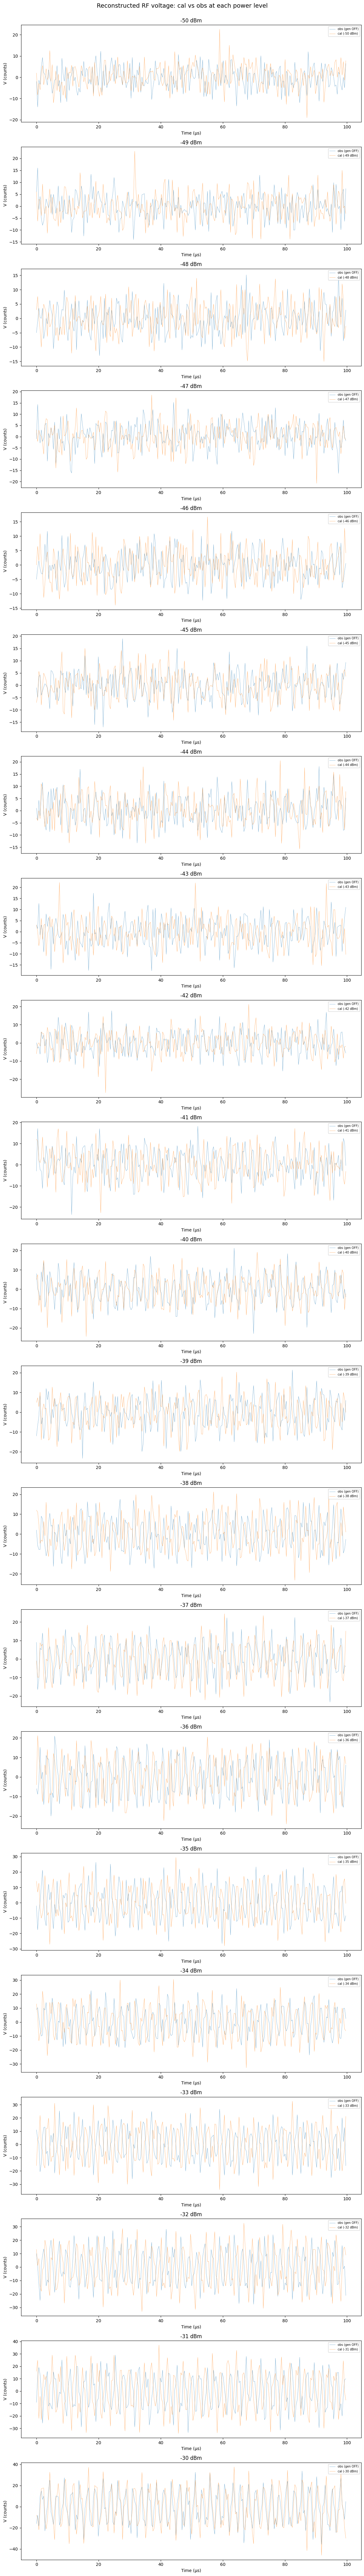

In [4]:
import matplotlib.pyplot as plt

sample_rate = 2.56e6
center_freq = 1.42e9
nshow = 256  # samples to plot (first block only)

t_us = np.arange(nshow) / sample_rate * 1e6  # time axis in microseconds

fig, axes = plt.subplots(21, 1, figsize=(12, 84))

for i, dbm in enumerate(range(-50, -29)):
    ax = axes[i]
    tone_key = f'COLD-TONE-{dbm}'
    base_key = f'COLD-BASE-{dbm}'

    cal_iq = df.loc[df['prefix'] == tone_key, 'samples'].values[0]
    obs_iq = df.loc[df['prefix'] == base_key, 'samples'].values[0]

    # Reconstruct RF: V(t) = I(t)cos(2π f_c t) - Q(t)sin(2π f_c t)
    t_s = np.arange(nshow) / sample_rate
    carrier_cos = np.cos(2 * np.pi * center_freq * t_s)
    carrier_sin = np.sin(2 * np.pi * center_freq * t_s)

    cal_rf = cal_iq[0, :nshow].real * carrier_cos - cal_iq[0, :nshow].imag * carrier_sin
    obs_rf = obs_iq[0, :nshow].real * carrier_cos - obs_iq[0, :nshow].imag * carrier_sin

    ax.plot(t_us, obs_rf, alpha=0.7, lw=0.5, label='obs (gen OFF)')
    ax.plot(t_us, cal_rf, alpha=0.7, lw=0.5, label=f'cal ({dbm} dBm)')
    ax.set_ylabel('V (counts)')
    ax.set_xlabel('Time (μs)')
    ax.set_title(f'{dbm} dBm')
    ax.legend(loc='upper right', fontsize=7)

fig.suptitle('Reconstructed RF voltage: cal vs obs at each power level', fontsize=14, y=1.0)
plt.tight_layout()
plt.show()

In [5]:
def power_spectrum(iq, sample_rate, center_freq):
    """Compute mean power spectrum from complex I/Q data.

    Parameters
    ----------
    iq : (nblocks, nsamples) complex array
    sample_rate, center_freq : float

    Returns
    -------
    freqs_mhz : frequency axis in MHz
    psd : mean |FFT|^2 averaged over blocks
    """
    nblocks, nsamples = iq.shape
    # Complex FFT + shift so DC is centered
    fft_data = np.fft.fftshift(np.fft.fft(iq, axis=1), axes=1)
    psd = np.mean(np.abs(fft_data)**2, axis=0)
    freqs = np.fft.fftshift(np.fft.fftfreq(nsamples, d=1.0/sample_rate))
    freqs_mhz = (freqs + center_freq) / 1e6
    return freqs_mhz, psd

# Compute power spectra for all 44 captures
sample_rate = df['sample_rate'].iloc[0]
center_freq = df['center_freq'].iloc[0]

df['freqs_mhz'] = None
df['psd'] = None
for idx, row in df.iterrows():
    freqs_mhz, psd = power_spectrum(row['samples'], sample_rate, center_freq)
    df.at[idx, 'freqs_mhz'] = freqs_mhz
    df.at[idx, 'psd'] = psd

print(f'Computed power spectra for {len(df)} captures')
print(f'Frequency range: {freqs_mhz[0]:.3f} – {freqs_mhz[-1]:.3f} MHz')
print(f'Frequency bins: {len(freqs_mhz)}')

Computed power spectra for 44 captures
Frequency range: 1418.720 – 1421.279 MHz
Frequency bins: 2048


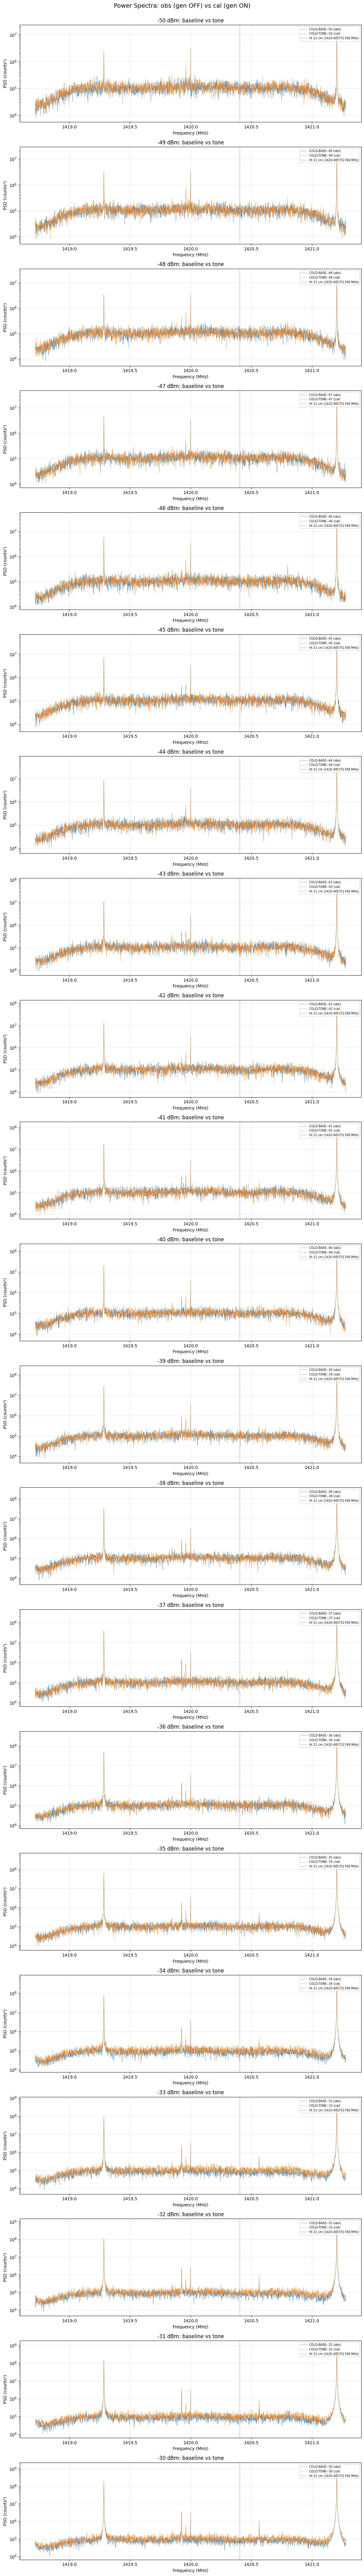

In [6]:
# 21 power spectrum plots: each dBm level (-50 to -30) with paired baseline
HI_FREQ = 1420.405751768  # 21-cm hydrogen line (MHz)

plot_pairs = []
for dbm in range(-50, -29):
    plot_pairs.append((f'COLD-BASE-{dbm}', f'COLD-TONE-{dbm}', f'{dbm} dBm: baseline vs tone'))

fig, axes = plt.subplots(len(plot_pairs), 1, figsize=(12, 4 * len(plot_pairs)))

for i, (obs_key, cal_key, title) in enumerate(plot_pairs):
    ax = axes[i]
    obs_row = df.loc[df['prefix'] == obs_key].iloc[0]
    cal_row = df.loc[df['prefix'] == cal_key].iloc[0]

    ax.semilogy(obs_row['freqs_mhz'], obs_row['psd'], lw=0.6, alpha=0.8, label=f'{obs_key} (obs)')
    ax.semilogy(cal_row['freqs_mhz'], cal_row['psd'], lw=0.6, alpha=0.8, label=f'{cal_key} (cal)')
    ax.axvline(HI_FREQ, color='purple', alpha=0.6, lw=0.8, ls='--', label=f'HI 21 cm ({HI_FREQ} MHz)')
    ax.set_ylabel('PSD (counts²)')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_title(title)
    ax.legend(loc='upper right', fontsize=7)
    ax.grid(True, alpha=0.3)

fig.suptitle('Power Spectra: obs (gen OFF) vs cal (gen ON)', fontsize=14, y=1.0)
plt.tight_layout()
plt.show()

In [7]:
# Summary statistics DataFrame
tone_freq_mhz = 1421.2058

stats_rows = []
for dbm in range(-50, -29):
    tone_row = df.loc[df['prefix'] == f'COLD-TONE-{dbm}'].iloc[0]
    base_row = df.loc[df['prefix'] == f'COLD-BASE-{dbm}'].iloc[0]

    freqs = tone_row['freqs_mhz']
    tone_psd = tone_row['psd']
    base_psd = base_row['psd']

    # Find the bin closest to the tone frequency
    tone_bin = np.argmin(np.abs(freqs - tone_freq_mhz))

    stats_rows.append({
        'siggen_amp_dBm': dbm,
        'tone_peak_psd': tone_psd[tone_bin],
        'base_psd_at_tone': base_psd[tone_bin],
        'tone_total_psd': np.sum(tone_psd),
        'base_total_psd': np.sum(base_psd),
        'tone_mean_psd': np.mean(tone_psd),
        'base_mean_psd': np.mean(base_psd),
        'tone_peak_freq_mhz': freqs[np.argmax(tone_psd)],
        'peak_snr_dB': 10 * np.log10(tone_psd[tone_bin] / base_psd[tone_bin]),
    })

psd_stats = pd.DataFrame(stats_rows)
psd_stats

siggen_amp_dBm  tone_peak_psd  base_psd_at_tone  tone_total_psd  \
0              -50   3.698269e+06      3.966163e+06    2.324630e+08   
1              -49   4.682354e+06      4.866322e+06    2.377255e+08   
2              -48   6.003176e+06      6.271498e+06    2.402187e+08   
3              -47   8.067153e+06      7.271777e+06    2.537267e+08   
4              -46   9.573887e+06      9.748896e+06    2.605167e+08   
5              -45   1.202705e+07      1.162030e+07    2.783721e+08   
6              -44   1.580882e+07      1.496884e+07    2.933293e+08   
7              -43   2.001112e+07      2.000013e+07    3.210625e+08   
8              -42   2.485787e+07      2.479700e+07    3.526877e+08   
9              -41   3.175844e+07      3.039235e+07    3.909775e+08   
10             -40   3.908660e+07      3.734308e+07    4.370543e+08   
11             -39   4.973136e+07      4.860306e+07    4.932309e+08   
12             -38   6.146913e+07      6.451630e+07    5.821694e+08   
13             -37   7.941823e+07      7.903594e+07    6.697687e+08   
14             -36   1.037796e+08      1.000833e+08    7.915735e+08   
15             -35   1.244606e+08      1.245917e+08    9.255014e+08   
16             -34   1.591031e+08      1.221716e+08    1.123234e+09   
17             -33   2.080641e+08      1.625981e+08    1.382484e+09   
18             -32   2.638351e+08      1.947257e+08    1.678920e+09   
19             -31   3.194190e+08      2.515288e+08    2.048991e+09   
20             -30   4.003394e+08      3.064693e+08    2.462056e+09   

    base_total_psd  tone_mean_psd  base_mean_psd  tone_peak_freq_mhz  \
0     2.172854e+08       113507.3       106096.4            1421.205   
1     2.297291e+08       116076.9       112172.4            1421.205   
2     2.369837e+08       117294.3       115714.7            1421.205   
3     2.468035e+08       123890.0       120509.5            1421.205   
4     2.550792e+08       127205.4       124550.4            1421.205   
5     2.697255e+08       135923.9       131701.9            1421.205   
6     2.896003e+08       143227.2       141406.4            1421.205   
7     3.212546e+08       156768.8       156862.6            1421.205   
8     3.436317e+08       172210.8       167788.9            1421.205   
9     3.861238e+08       190907.0       188537.0            1421.205   
10    4.192836e+08       213405.4       204728.3            1421.205   
11    4.923048e+08       240835.4       240383.2            1421.205   
12    5.705167e+08       284262.4       278572.6            1421.205   
13    6.629505e+08       327035.5       323706.3            1421.205   
14    7.797674e+08       386510.5       380745.8            1421.205   
15    9.058656e+08       451905.0       442317.2            1421.205   
16    8.674836e+08       548454.0       423576.0            1421.205   
17    1.039763e+09       675041.1       507696.7            1421.205   
18    1.255196e+09       819785.0       612888.7            1421.205   
19    1.533321e+09      1000483.9       748691.9            1421.205   
20    1.837546e+09      1202176.0       897239.2            1421.205   

    peak_snr_dB  
0     -0.303721  
1     -0.167366  
2     -0.189902  
3      0.450797  
4     -0.078672  
5      0.149417  
6      0.237113  
7      0.002387  
8      0.010647  
9      0.190948  
10     0.198177  
11     0.099667  
12    -0.210124  
13     0.020956  
14     0.157505  
15    -0.004573  
16     1.147083  
17     1.070817  
18     1.319092  
19     1.037730  
20     1.160413

In [8]:
from scipy.signal import find_peaks

def find_significant_peaks(freqs_mhz, psd, prominence_factor=5.0, min_distance=5):
    """Find peaks that stand significantly above the local noise floor.

    Parameters
    ----------
    freqs_mhz : array, frequency axis
    psd : array, power spectral density
    prominence_factor : float, peak must be this many times the median PSD
    min_distance : int, minimum bin separation between peaks

    Returns
    -------
    list of dicts with freq_mhz, psd_value, prominence, snr_over_median
    """
    median_psd = np.median(psd)
    # Find peaks with prominence above median * factor
    peak_idx, properties = find_peaks(
        psd,
        prominence=median_psd * prominence_factor,
        distance=min_distance,
    )
    results = []
    for i, pidx in enumerate(peak_idx):
        results.append({
            'freq_mhz': freqs_mhz[pidx],
            'psd': psd[pidx],
            'prominence': properties['prominences'][i],
            'snr_over_median_dB': 10 * np.log10(psd[pidx] / median_psd),
        })
    return results

# Run peak detection on all 44 captures
peak_rows = []
for _, row in df.iterrows():
    peaks = find_significant_peaks(row['freqs_mhz'], row['psd'], prominence_factor=3.0)
    for p in peaks:
        peak_rows.append({
            'prefix': row['prefix'],
            'type': row['type'],
            'siggen_amp': row['siggen_amp'],
            **p,
        })

peaks_df = pd.DataFrame(peak_rows)
print(f'Found {len(peaks_df)} significant peaks across all captures\n')

# Show unique peak frequencies (rounded to nearest bin)
if len(peaks_df) > 0:
    peaks_df['freq_rounded'] = peaks_df['freq_mhz'].round(3)
    print('Peak frequency summary (all captures):')
    freq_counts = peaks_df.groupby('freq_rounded').agg(
        count=('prefix', 'count'),
        in_cal=('type', lambda x: (x == 'cal').sum()),
        in_obs=('type', lambda x: (x == 'obs').sum()),
        max_snr_dB=('snr_over_median_dB', 'max'),
        mean_snr_dB=('snr_over_median_dB', 'mean'),
    ).sort_values('count', ascending=False)
    print(freq_counts.to_string())
    print()

peaks_df

Found 225 significant peaks across all captures

Peak frequency summary (all captures):
              count  in_cal  in_obs  max_snr_dB  mean_snr_dB
freq_rounded                                                
1420.000         44      21      23   16.494679    15.534262
1419.285         43      21      22   32.713551    23.522682
1419.961         43      20      23    9.254119     7.847401
1421.205         43      21      22   41.066968    31.823881
1419.925         30      15      15   16.510964    10.996248
1420.565         16       8       8   10.774487     7.985247
1420.800          3       2       1    7.007567     6.180368
1419.846          2       1       1    6.140314     6.084976
1420.034          1       1       0    5.793708     5.793708



prefix type  siggen_amp    freq_mhz           psd    prominence  \
0     COLD-BASE-PRE  obs         NaN  1419.96125  6.487474e+05  5.712572e+05   
1     COLD-BASE-PRE  obs         NaN  1420.00000  2.948850e+06  2.937652e+06   
2     COLD-TONE--50  cal       -50.0  1419.28500  2.715668e+06  2.689533e+06   
3     COLD-TONE--50  cal       -50.0  1419.96125  7.467521e+05  6.707750e+05   
4     COLD-TONE--50  cal       -50.0  1420.00000  3.176379e+06  3.158923e+06   
..              ...  ...         ...         ...           ...           ...   
220  COLD-BASE-POST  obs         NaN  1419.92500  2.912170e+06  2.866083e+06   
221  COLD-BASE-POST  obs         NaN  1419.96125  4.427902e+05  3.739915e+05   
222  COLD-BASE-POST  obs         NaN  1420.00000  3.052947e+06  3.023485e+06   
223  COLD-BASE-POST  obs         NaN  1420.56500  8.469572e+05  8.205886e+05   
224  COLD-BASE-POST  obs         NaN  1421.20500  9.276425e+08  9.276088e+08   

     snr_over_median_dB  freq_rounded  
0              8.299226      1419.961  
1             14.874997      1420.000  
2             14.411294      1419.285  
3              8.804292      1419.961  
4             15.091850      1420.000  
..                  ...           ...  
220           15.572278      1419.925  
221            7.392091      1419.961  
222           15.777303      1420.000  
223           10.208725      1420.565  
224           40.603917      1421.205  

[225 rows x 8 columns]

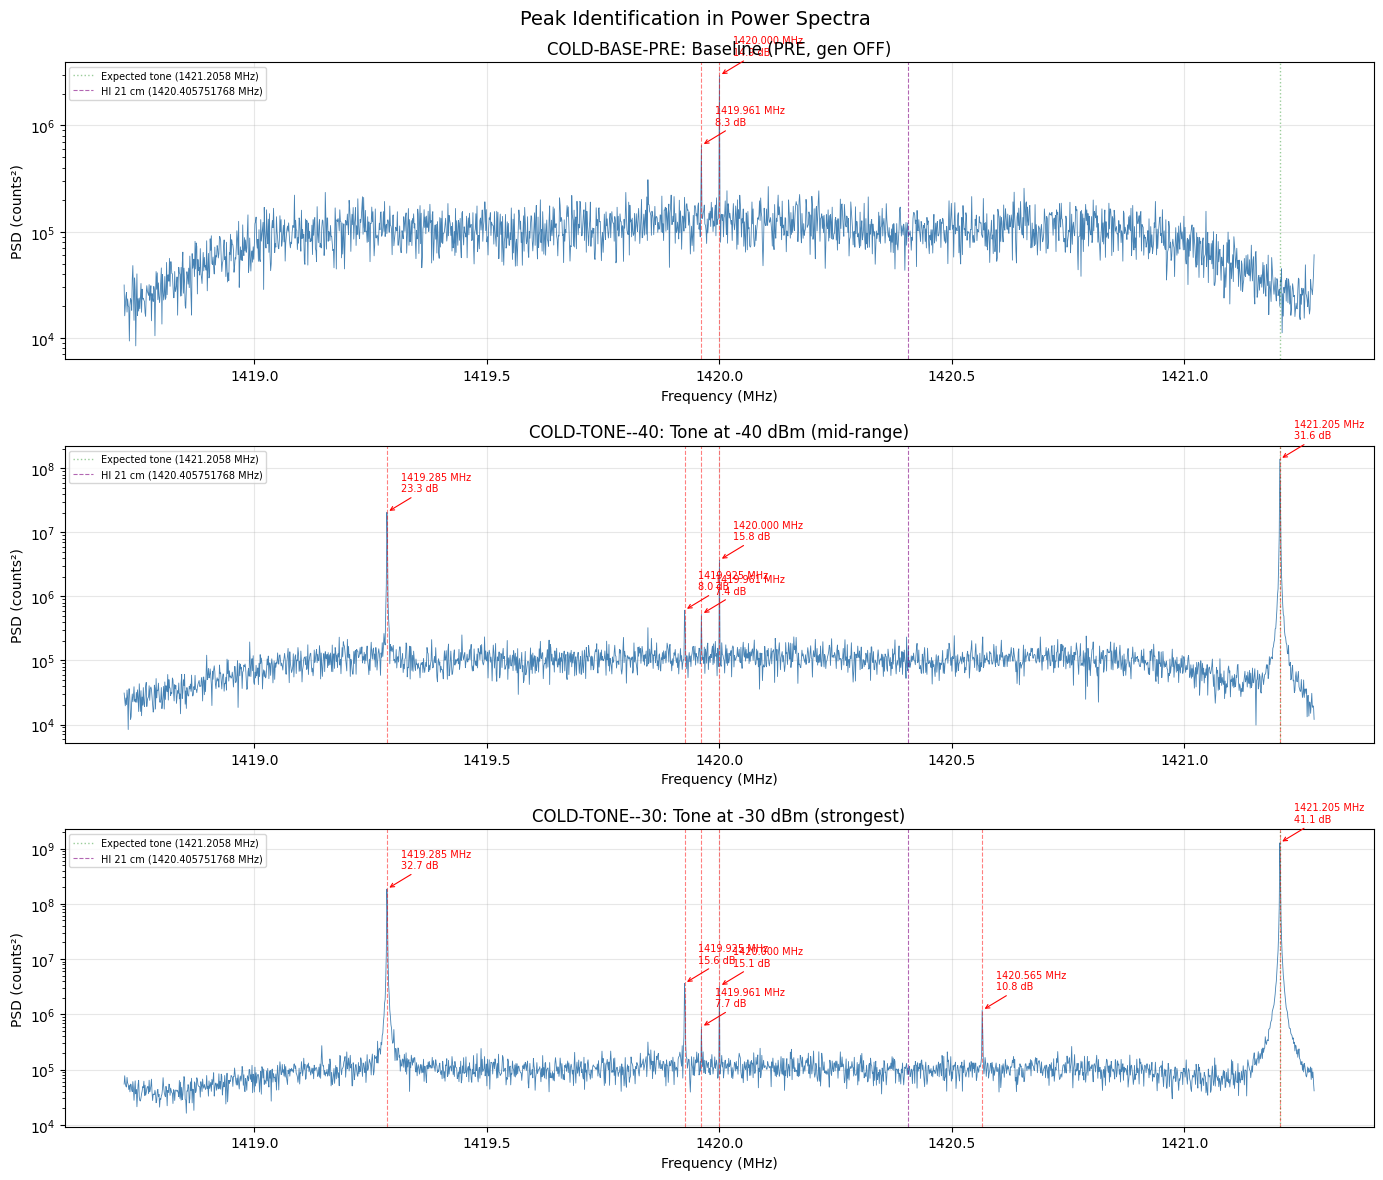

In [9]:
# Annotated peak identification on a few representative spectra
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

examples = [
    ('COLD-BASE-PRE', 'Baseline (PRE, gen OFF)'),
    ('COLD-TONE--40', 'Tone at -40 dBm (mid-range)'),
    ('COLD-TONE--30', 'Tone at -30 dBm (strongest)'),
]

tone_freq_mhz = 1421.2058

for ax, (key, title) in zip(axes, examples):
    row = df.loc[df['prefix'] == key].iloc[0]
    freqs = row['freqs_mhz']
    psd = row['psd']

    ax.semilogy(freqs, psd, lw=0.6, color='steelblue')

    # Mark detected peaks
    peaks = find_significant_peaks(freqs, psd, prominence_factor=3.0)
    for p in peaks:
        ax.axvline(p['freq_mhz'], color='red', alpha=0.5, lw=0.8, ls='--')
        ax.annotate(
            f"{p['freq_mhz']:.3f} MHz\n{p['snr_over_median_dB']:.1f} dB",
            xy=(p['freq_mhz'], p['psd']),
            xytext=(10, 15), textcoords='offset points',
            fontsize=7, color='red',
            arrowprops=dict(arrowstyle='->', color='red', lw=0.8),
        )

    # Mark expected tone location
    ax.axvline(tone_freq_mhz, color='green', alpha=0.4, lw=1, ls=':',
               label=f'Expected tone ({tone_freq_mhz} MHz)')
    # Mark HI 21-cm line
    ax.axvline(HI_FREQ, color='purple', alpha=0.6, lw=0.8, ls='--',
               label=f'HI 21 cm ({HI_FREQ} MHz)')

    ax.set_ylabel('PSD (counts²)')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_title(f'{key}: {title}')
    ax.legend(loc='upper left', fontsize=7)
    ax.grid(True, alpha=0.3)

fig.suptitle('Peak Identification in Power Spectra', fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
# --- Step 3: Baseline subtraction ---
# For each dBm level, subtract the paired baseline PSD from the tone PSD
# to isolate the injected signal from system noise.

tone_freq_mhz = 1421.2058

sub_rows = []
for dbm in range(-50, -29):
    tone_row = df.loc[df['prefix'] == f'COLD-TONE-{dbm}'].iloc[0]
    base_row = df.loc[df['prefix'] == f'COLD-BASE-{dbm}'].iloc[0]

    freqs = tone_row['freqs_mhz']
    diff_psd = tone_row['psd'] - base_row['psd']

    tone_bin = np.argmin(np.abs(freqs - tone_freq_mhz))

    sub_rows.append({
        'siggen_amp_dBm': dbm,
        'freqs_mhz': freqs,
        'diff_psd': diff_psd,
        'tone_bin_diff': diff_psd[tone_bin],
        'tone_bin_psd_cal': tone_row['psd'][tone_bin],
        'tone_bin_psd_base': base_row['psd'][tone_bin],
        'total_diff': np.sum(diff_psd),
        'mean_diff': np.mean(diff_psd),
    })

sub_df = pd.DataFrame(sub_rows)

# Summary table
print('Baseline-subtracted tone power at 1421.205 MHz:')
print(sub_df[['siggen_amp_dBm', 'tone_bin_psd_cal', 'tone_bin_psd_base',
              'tone_bin_diff', 'total_diff', 'mean_diff']].to_string(index=False))


Baseline-subtracted tone power at 1421.205 MHz:
 siggen_amp_dBm  tone_bin_psd_cal  tone_bin_psd_base  tone_bin_diff  total_diff  mean_diff
            -50      3.698269e+06       3.966163e+06  -2.678942e+05  15177523.2     7410.9
            -49      4.682354e+06       4.866322e+06  -1.839684e+05   7996416.0     3904.5
            -48      6.003176e+06       6.271498e+06  -2.683220e+05   3235020.8     1579.6
            -47      8.067153e+06       7.271777e+06   7.953758e+05   6923264.0     3380.5
            -46      9.573887e+06       9.748896e+06  -1.750095e+05   5437440.0     2655.0
            -45      1.202705e+07       1.162030e+07   4.067488e+05   8646656.0     4222.0
            -44      1.580882e+07       1.496884e+07   8.399796e+05   3728998.4     1820.8
            -43      2.001112e+07       2.000013e+07   1.099500e+04   -192102.4      -93.8
            -42      2.485787e+07       2.479700e+07   6.086458e+04   9056051.2     4421.9
            -41      3.175844e+07       3.

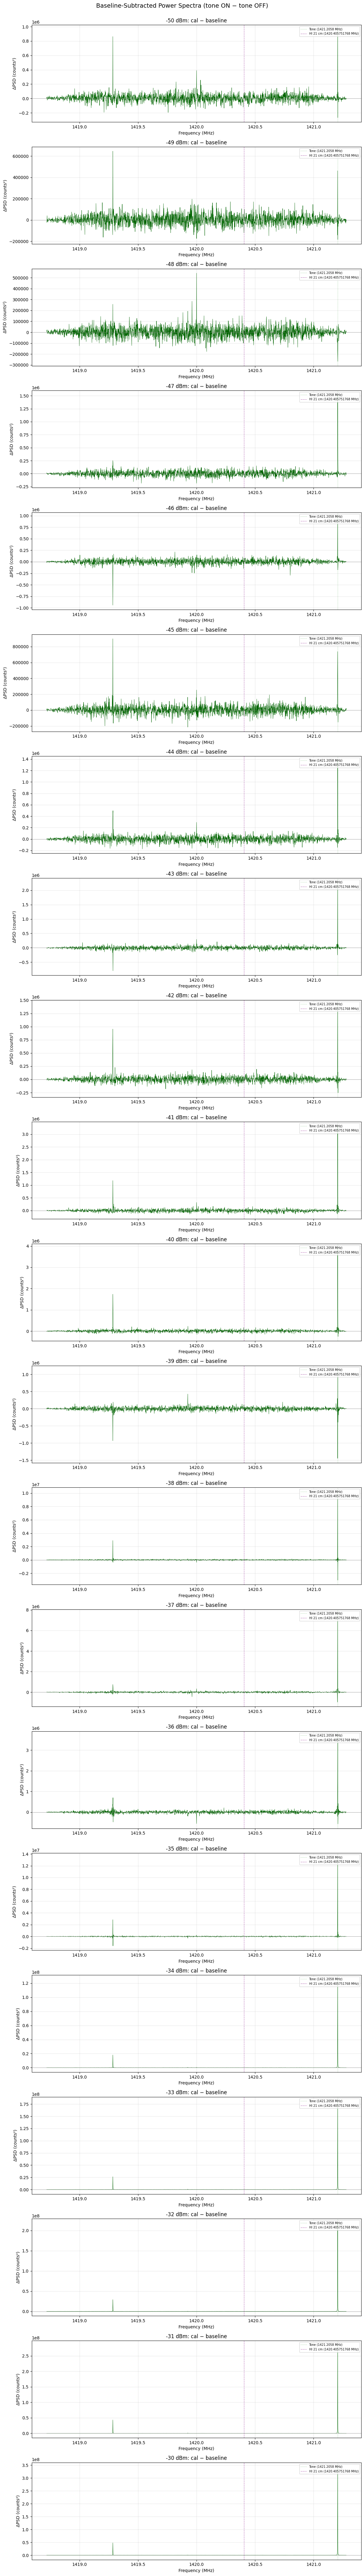

In [11]:
# 21 baseline-subtracted spectra (cal - obs) for each dBm level
fig, axes = plt.subplots(21, 1, figsize=(12, 84))

for i, row in sub_df.iterrows():
    ax = axes[i]
    dbm = row['siggen_amp_dBm']
    freqs = row['freqs_mhz']
    diff = row['diff_psd']

    ax.plot(freqs, diff, lw=0.6, color='darkgreen')
    ax.axhline(0, color='gray', lw=0.5, ls='-')
    ax.axvline(tone_freq_mhz, color='green', alpha=0.4, lw=1, ls=':',
               label=f'Tone ({tone_freq_mhz} MHz)')
    ax.axvline(HI_FREQ, color='purple', alpha=0.6, lw=0.8, ls='--',
               label=f'HI 21 cm ({HI_FREQ} MHz)')
    ax.set_ylabel('ΔPSD (counts²)')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_title(f'{int(dbm)} dBm: cal − baseline')
    ax.legend(loc='upper right', fontsize=7)
    ax.grid(True, alpha=0.3)

fig.suptitle('Baseline-Subtracted Power Spectra (tone ON − tone OFF)', fontsize=14, y=1.0)
plt.tight_layout()
plt.show()

In [12]:
# Baseline-subtracted statistics DataFrame
sub_stats = sub_df[['siggen_amp_dBm', 'tone_bin_diff', 'total_diff', 'mean_diff']].copy()
sub_stats['tone_diff_dB'] = 10 * np.log10(np.abs(sub_stats['tone_bin_diff']))
sub_stats['tone_diff_positive'] = sub_stats['tone_bin_diff'] > 0
sub_stats

siggen_amp_dBm  tone_bin_diff   total_diff  mean_diff  tone_diff_dB  \
0              -50  -2.678942e+05   15177523.2     7410.9     54.279634   
1              -49  -1.839684e+05    7996416.0     3904.5     52.647432   
2              -48  -2.683220e+05    3235020.8     1579.6     54.286563   
3              -47   7.953758e+05    6923264.0     3380.5     59.005724   
4              -46  -1.750095e+05    5437440.0     2655.0     52.430617   
5              -45   4.067488e+05    8646656.0     4222.0     56.093262   
6              -44   8.399796e+05    3728998.4     1820.8     59.242687   
7              -43   1.099500e+04    -192102.4      -93.8     40.411951   
8              -42   6.086458e+04    9056051.2     4421.9     47.843647   
9              -41   1.366087e+06    4853760.0     2370.0     61.354784   
10             -40   1.743519e+06   17770700.8     8677.1     62.414267   
11             -39   1.128301e+06     926105.6      452.2     60.524250   
12             -38  -3.047173e+06   11652710.4     5689.8     64.838971   
13             -37   3.822894e+05    6818201.6     3329.2     55.823923   
14             -36   3.696329e+06   11806105.6     5764.7     65.677707   
15             -35  -1.311222e+05   19635814.4     9587.8     51.176761   
16             -34   3.693150e+07  255750144.0   124878.0     75.673970   
17             -33   4.546602e+07  342721331.2   167344.4     76.576869   
18             -32   6.910935e+07  423723622.4   206896.3     78.395368   
19             -31   6.789017e+07  515670016.0   251792.0     78.318069   
20             -30   9.387007e+07  624510566.4   304936.8     79.725271   

    tone_diff_positive  
0                False  
1                False  
2                False  
3                 True  
4                False  
5                 True  
6                 True  
7                 True  
8                 True  
9                 True  
10                True  
11                True  
12               False  
13                True  
14                True  
15               False  
16                True  
17                True  
18                True  
19                True  
20                True

In [13]:
# --- Step 4: Linearity check ---
# Plot measured tone power vs input power (dBm).
# On a dB-vs-dB scale, a linear receiver should give slope ≈ 1.

from scipy.stats import linregress

# Use baseline-subtracted tone power at the tone bin
input_dbm = sub_df['siggen_amp_dBm'].values.astype(float)
tone_power = sub_df['tone_bin_diff'].values.astype(float)

# Also use total integrated power difference (more robust)
total_diff = sub_df['total_diff'].values.astype(float)

# Only fit where tone_bin_diff > 0 (tone is detectable above noise)
mask = tone_power > 0
input_fit = input_dbm[mask]
tone_power_fit = tone_power[mask]
tone_power_db = 10 * np.log10(tone_power_fit)

# Linear regression on dB vs dBm
slope, intercept, r_value, p_value, std_err = linregress(input_fit, tone_power_db)

print(f'Linearity fit (baseline-subtracted tone bin):')
print(f'  Points used: {mask.sum()} / {len(mask)} (where cal > base)')
print(f'  Slope:     {slope:.4f} dB/dBm  (ideal = 1.0)')
print(f'  Intercept: {intercept:.2f} dB')
print(f'  R²:        {r_value**2:.6f}')
print(f'  Std error: {std_err:.4f}')
print()

# Also fit total integrated power
mask_total = total_diff > 0
input_fit_t = input_dbm[mask_total]
total_db = 10 * np.log10(total_diff[mask_total])
slope_t, intercept_t, r_t, _, stderr_t = linregress(input_fit_t, total_db)

print(f'Linearity fit (total integrated power diff):')
print(f'  Points used: {mask_total.sum()} / {len(mask_total)}')
print(f'  Slope:     {slope_t:.4f} dB/dBm  (ideal = 1.0)')
print(f'  Intercept: {intercept_t:.2f} dB')
print(f'  R²:        {r_t**2:.6f}')

Linearity fit (baseline-subtracted tone bin):
  Points used: 15 / 21 (where cal > base)
  Slope:     1.7891 dB/dBm  (ideal = 1.0)
  Intercept: 132.27 dB
  R²:        0.673467
  Std error: 0.3455

Linearity fit (total integrated power diff):
  Points used: 20 / 21
  Slope:     0.9620 dB/dBm  (ideal = 1.0)
  Intercept: 111.28 dB
  R²:        0.527945


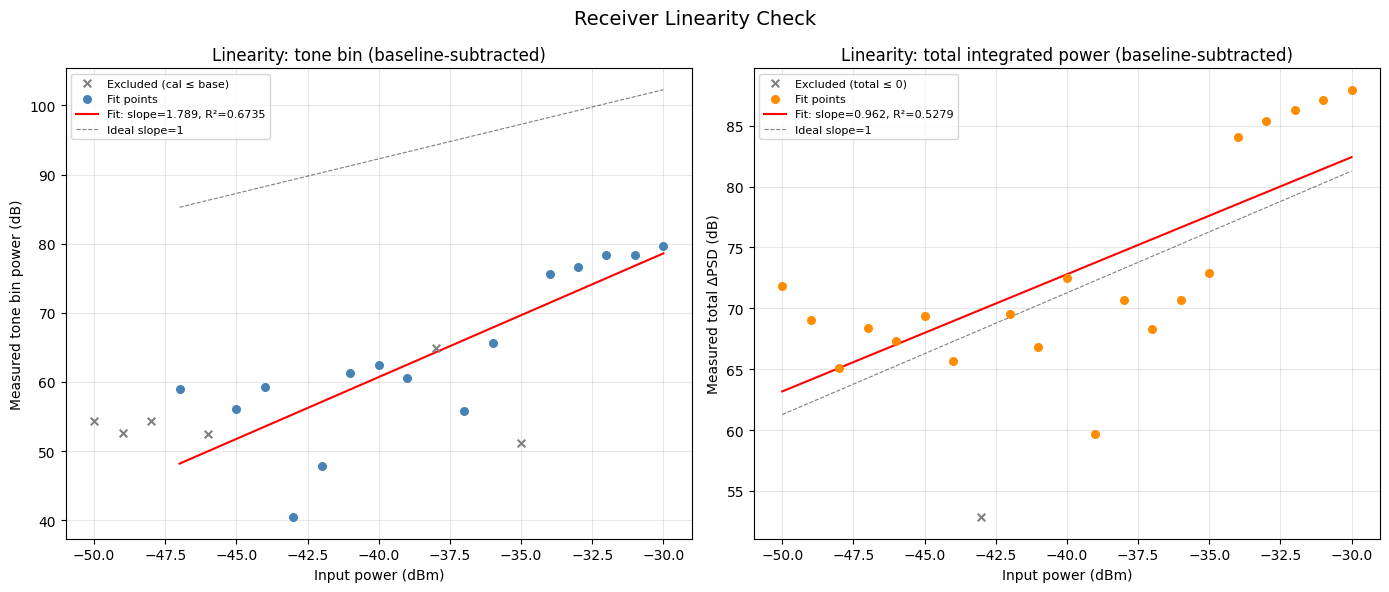

In [14]:
# Linearity plot: measured output power (dB) vs input power (dBm)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Left: tone bin power ---
# Plot all points, color by whether they were included in the fit
ax1.scatter(input_dbm[~mask], 10 * np.log10(np.abs(tone_power[~mask])),
            marker='x', color='gray', s=30, label='Excluded (cal ≤ base)', zorder=3)
ax1.scatter(input_fit, tone_power_db,
            marker='o', color='steelblue', s=30, label='Fit points', zorder=3)

# Fit line
x_line = np.linspace(input_fit.min(), input_fit.max(), 100)
ax1.plot(x_line, slope * x_line + intercept, 'r-', lw=1.5,
         label=f'Fit: slope={slope:.3f}, R²={r_value**2:.4f}')

# Ideal slope=1 reference
ax1.plot(x_line, 1.0 * x_line + intercept, 'k--', lw=0.8, alpha=0.5,
         label='Ideal slope=1')

ax1.set_xlabel('Input power (dBm)')
ax1.set_ylabel('Measured tone bin power (dB)')
ax1.set_title('Linearity: tone bin (baseline-subtracted)')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# --- Right: total integrated power ---
ax2.scatter(input_dbm[~mask_total], 10 * np.log10(np.abs(total_diff[~mask_total])),
            marker='x', color='gray', s=30, label='Excluded (total ≤ 0)', zorder=3)
ax2.scatter(input_fit_t, total_db,
            marker='o', color='darkorange', s=30, label='Fit points', zorder=3)

x_line_t = np.linspace(input_fit_t.min(), input_fit_t.max(), 100)
ax2.plot(x_line_t, slope_t * x_line_t + intercept_t, 'r-', lw=1.5,
         label=f'Fit: slope={slope_t:.3f}, R²={r_t**2:.4f}')
ax2.plot(x_line_t, 1.0 * x_line_t + intercept_t, 'k--', lw=0.8, alpha=0.5,
         label='Ideal slope=1')

ax2.set_xlabel('Input power (dBm)')
ax2.set_ylabel('Measured total ΔPSD (dB)')
ax2.set_title('Linearity: total integrated power (baseline-subtracted)')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

fig.suptitle('Receiver Linearity Check', fontsize=14)
plt.tight_layout()
plt.show()

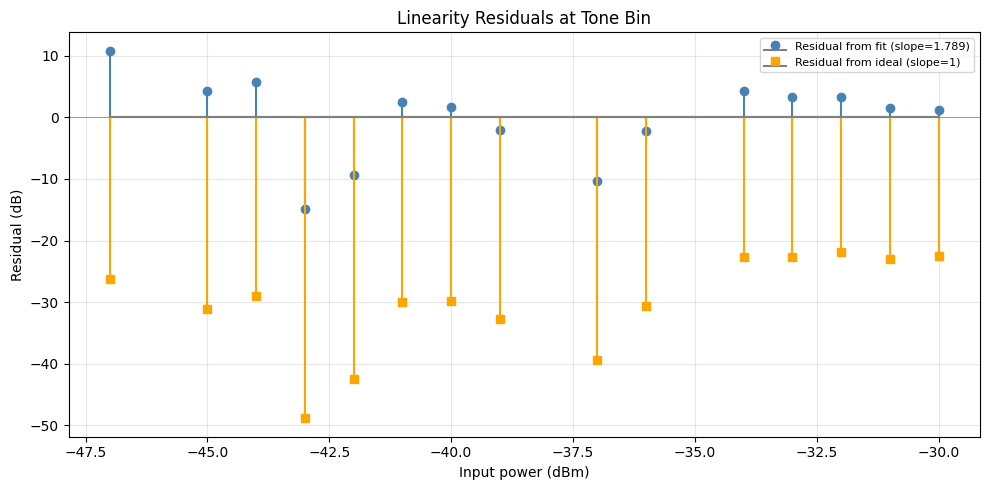

In [15]:
# Residuals from ideal linearity
fig, ax = plt.subplots(figsize=(10, 5))

residual = tone_power_db - (slope * input_fit + intercept)
ideal_residual = tone_power_db - (1.0 * input_fit + intercept)

ax.stem(input_fit, residual, linefmt='steelblue', markerfmt='o', basefmt='gray',
        label=f'Residual from fit (slope={slope:.3f})')
ax.stem(input_fit, ideal_residual, linefmt='orange', markerfmt='s', basefmt='gray',
        label='Residual from ideal (slope=1)')
ax.axhline(0, color='gray', lw=0.5)
ax.set_xlabel('Input power (dBm)')
ax.set_ylabel('Residual (dB)')
ax.set_title('Linearity Residuals at Tone Bin')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# --- Step 5: Noise floor & system temperature ---
# Characterize the system noise from baseline-only captures.
# T_sys = P_noise / (k_B * B) where B = bandwidth per bin

k_B = 1.380649e-23  # Boltzmann constant (J/K)
sample_rate_hz = df['sample_rate'].iloc[0]
nsamples = 2048
bin_bw = sample_rate_hz / nsamples  # Hz per bin

# Collect noise statistics from all 23 baseline (obs) captures
obs_df = df[df['type'] == 'obs'].copy()

noise_rows = []
for _, row in obs_df.iterrows():
    psd = row['psd']
    iq = row['samples']

    # Exclude DC bin (center) and tone bin region for clean noise estimate
    freqs = row['freqs_mhz']
    dc_bin = np.argmin(np.abs(freqs - 1420.0))
    tone_bin = np.argmin(np.abs(freqs - tone_freq_mhz))

    # Mask: exclude ±5 bins around DC and tone
    mask = np.ones(len(psd), dtype=bool)
    mask[max(0, dc_bin-5):dc_bin+6] = False
    mask[max(0, tone_bin-5):tone_bin+6] = False

    clean_psd = psd[mask]

    # RMS voltage from time domain
    vrms = np.sqrt(np.mean(np.abs(iq)**2))

    noise_rows.append({
        'prefix': row['prefix'],
        'unix_time': row['unix_time'],
        'mean_psd': np.mean(clean_psd),
        'median_psd': np.median(clean_psd),
        'std_psd': np.std(clean_psd),
        'total_power': np.sum(psd),
        'vrms': vrms,
    })

noise_df = pd.DataFrame(noise_rows)

print('Baseline noise statistics (obs captures, excluding DC & tone bins):')
print(f'  Mean PSD across baselines:   {noise_df["mean_psd"].mean():.1f} counts²')
print(f'  Std of mean PSD:             {noise_df["mean_psd"].std():.1f} counts²')
print(f'  Mean Vrms:                   {noise_df["vrms"].mean():.2f} counts')
print(f'  Bin bandwidth:               {bin_bw:.1f} Hz')
print(f'  Total bandwidth:             {sample_rate_hz/1e6:.2f} MHz')
print()
noise_df

Baseline noise statistics (obs captures, excluding DC & tone bins):
  Mean PSD across baselines:   125500.2 counts²
  Std of mean PSD:             34220.1 counts²
  Mean Vrms:                   11.74 counts
  Bin bandwidth:               1250.0 Hz
  Total bandwidth:             2.56 MHz



prefix     unix_time       mean_psd    median_psd       std_psd  \
0    COLD-BASE-PRE  1.770794e+09   98539.866570  95998.871199  4.603879e+04   
1    COLD-BASE--50  1.770794e+09   94873.454489  91439.473135  6.051255e+04   
2    COLD-BASE--49  1.770794e+09   97082.398879  92853.993719  7.892503e+04   
3    COLD-BASE--48  1.770794e+09   97812.814785  93333.360669  8.528074e+04   
4    COLD-BASE--47  1.770795e+09   98520.245228  93814.584775  1.092891e+05   
5    COLD-BASE--46  1.770795e+09   97336.977204  91034.779046  1.429721e+05   
6    COLD-BASE--45  1.770795e+09   99073.047603  92756.580108  1.496859e+05   
7    COLD-BASE--44  1.770795e+09   99959.357292  92981.046382  1.823702e+05   
8    COLD-BASE--43  1.770795e+09  104450.091839  94974.811469  2.543323e+05   
9    COLD-BASE--42  1.770795e+09  103591.337822  92815.341108  2.784706e+05   
10   COLD-BASE--41  1.770795e+09  109040.962400  93407.388398  3.804168e+05   
11   COLD-BASE--40  1.770795e+09  107513.212950  90831.461829  4.382753e+05   
12   COLD-BASE--39  1.770795e+09  115232.335845  93451.908524  6.068205e+05   
13   COLD-BASE--38  1.770795e+09  122049.298110  93045.911362  7.058005e+05   
14   COLD-BASE--37  1.770795e+09  130117.540955  94906.184285  9.095966e+05   
15   COLD-BASE--36  1.770795e+09  139202.437759  94599.407917  1.164183e+06   
16   COLD-BASE--35  1.770795e+09  147115.046815  92697.578297  1.400695e+06   
17   COLD-BASE--34  1.770795e+09  131059.392448  77750.364176  1.385702e+06   
18   COLD-BASE--33  1.770795e+09  142347.074884  75410.963030  1.672236e+06   
19   COLD-BASE--32  1.770795e+09  159461.839434  78303.232385  2.100223e+06   
20   COLD-BASE--31  1.770795e+09  181581.612637  78783.699877  2.616340e+06   
21   COLD-BASE--30  1.770795e+09  205241.193310  78132.455337  3.216807e+06   
22  COLD-BASE-POST  1.770795e+09  205302.943731  80122.103630  3.200818e+06   

     total_power       vrms  
0   2.043132e+08   6.979403  
1   2.172854e+08   7.197561  
2   2.297291e+08   7.400789  
3   2.369837e+08   7.516736  
4   2.468035e+08   7.670888  
5   2.550792e+08   7.798437  
6   2.697255e+08   8.019200  
7   2.896003e+08   8.309398  
8   3.212546e+08   8.751746  
9   3.436317e+08   9.051418  
10  3.861238e+08   9.594742  
11  4.192836e+08   9.998249  
12  4.923048e+08  10.833956  
13  5.705167e+08  11.662837  
14  6.629505e+08  12.572180  
15  7.797674e+08  13.634920  
16  9.058656e+08  14.696095  
17  8.674836e+08  14.381384  
18  1.039763e+09  15.744802  
19  1.255196e+09  17.299192  
20  1.533321e+09  19.119943  
21  1.837546e+09  20.930960  
22  1.837971e+09  20.933383

In [17]:
# System temperature estimate using the calibration slope
# From step 4, we have: measured_dB = slope * input_dBm + intercept
# The noise floor in the same units lets us estimate T_sys.
#
# Method: use the linearity fit from total integrated power (more robust).
# At the noise floor (no tone), the total power is just system noise.
# P_noise (counts²) = mean baseline total_power
# P_tone (counts²) at known input → calibration factor counts²/Watt
# T_sys = P_noise / (cal_factor * k_B * B)

# Use a high-SNR cal point for calibration (e.g. -30 dBm)
cal_dbm = -30.0
cal_row = sub_df.loc[sub_df['siggen_amp_dBm'] == cal_dbm].iloc[0]
cal_power_watts = 10**((cal_dbm) / 10) * 1e-3  # dBm to Watts

# Baseline-subtracted total power at this level = counts² from the tone alone
cal_counts2 = cal_row['total_diff']

# Calibration factor: counts² per Watt
cal_factor = cal_counts2 / cal_power_watts

# Mean noise floor from baselines (total power)
mean_noise_counts2 = noise_df['total_power'].mean()

# Noise power in Watts
noise_watts = mean_noise_counts2 / cal_factor

# System temperature: P = k_B * T * B
T_sys = noise_watts / (k_B * sample_rate_hz)

print(f'Calibration reference: {cal_dbm} dBm = {cal_power_watts:.2e} W')
print(f'  Baseline-subtracted counts²: {cal_counts2:.3e}')
print(f'  Calibration factor: {cal_factor:.3e} counts²/W')
print()
print(f'Mean baseline noise:')
print(f'  Total PSD: {mean_noise_counts2:.3e} counts²')
print(f'  Equivalent power: {noise_watts:.3e} W')
print()
print(f'System temperature estimate:')
print(f'  T_sys = {T_sys:.0f} K')
print()
print('Note: This is a rough estimate. The ADC quantization, gain chain,')
print('and impedance matching all affect the absolute calibration.')

Calibration reference: -30.0 dBm = 1.00e-06 W
  Baseline-subtracted counts²: 6.245e+08
  Calibration factor: 6.245e+14 counts²/W

Mean baseline noise:
  Total PSD: 6.610e+08 counts²
  Equivalent power: 1.058e-06 W

System temperature estimate:
  T_sys = 29944986355 K

Note: This is a rough estimate. The ADC quantization, gain chain,
and impedance matching all affect the absolute calibration.


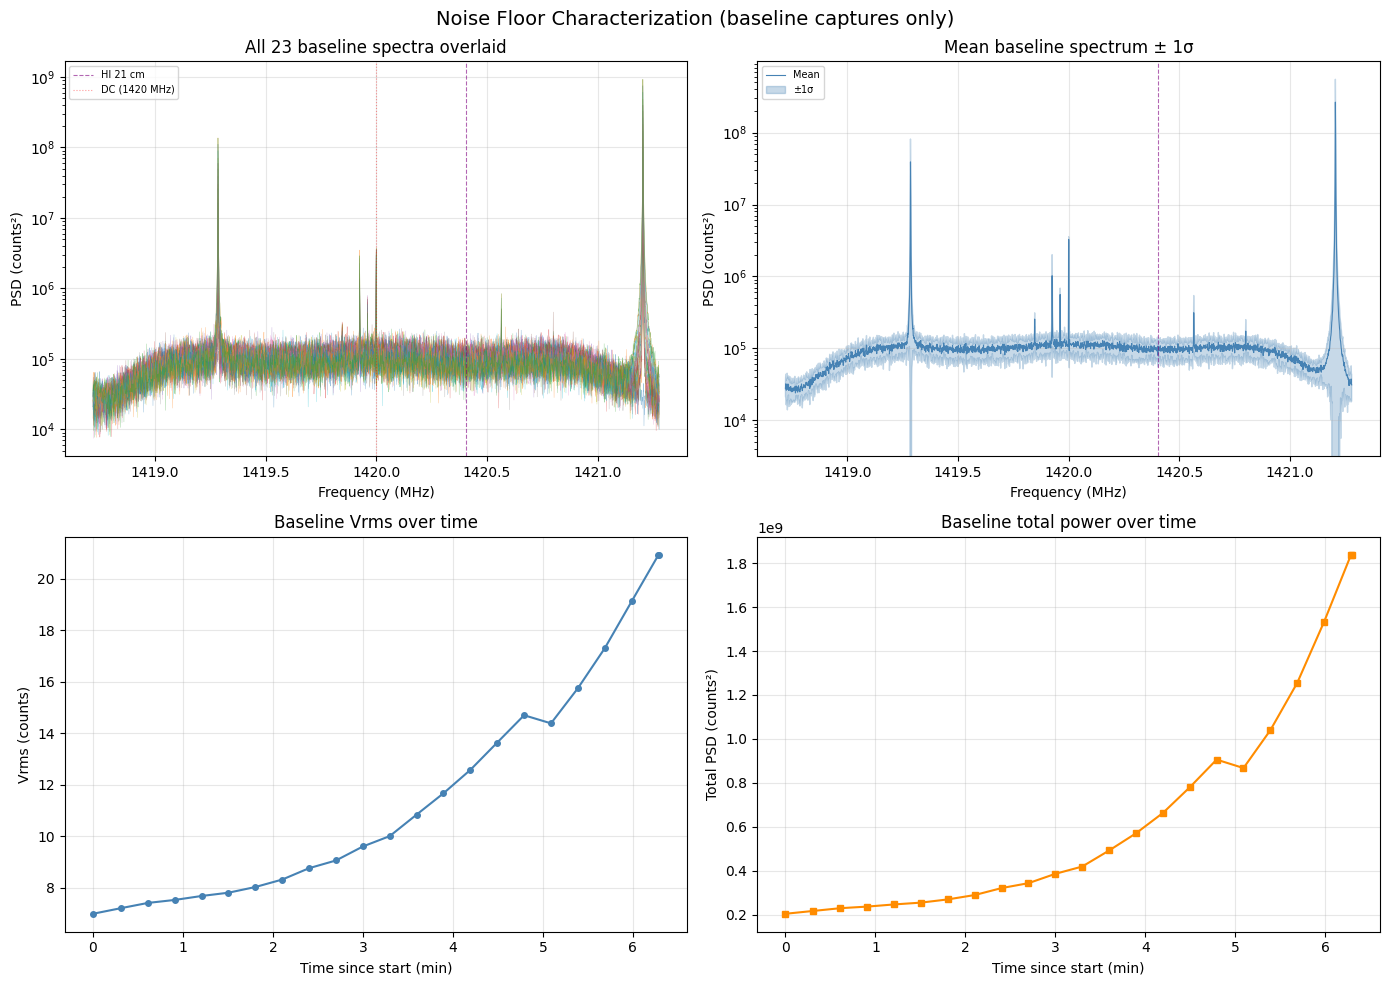

In [18]:
# Noise floor visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top-left: overlay all baseline spectra
ax = axes[0, 0]
for _, row in obs_df.iterrows():
    ax.semilogy(row['freqs_mhz'], row['psd'], lw=0.3, alpha=0.5)
ax.axvline(HI_FREQ, color='purple', alpha=0.6, lw=0.8, ls='--', label='HI 21 cm')
ax.axvline(1420.0, color='red', alpha=0.4, lw=0.8, ls=':', label='DC (1420 MHz)')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('PSD (counts²)')
ax.set_title(f'All {len(obs_df)} baseline spectra overlaid')
ax.legend(fontsize=7)
ax.grid(True, alpha=0.3)

# Top-right: mean ± std baseline spectrum
ax = axes[0, 1]
all_psd = np.array([row['psd'] for _, row in obs_df.iterrows()])
mean_psd = np.mean(all_psd, axis=0)
std_psd = np.std(all_psd, axis=0)
freqs = obs_df.iloc[0]['freqs_mhz']
ax.semilogy(freqs, mean_psd, lw=0.8, color='steelblue', label='Mean')
ax.fill_between(freqs, mean_psd - std_psd, mean_psd + std_psd,
                alpha=0.3, color='steelblue', label='±1σ')
ax.axvline(HI_FREQ, color='purple', alpha=0.6, lw=0.8, ls='--')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('PSD (counts²)')
ax.set_title('Mean baseline spectrum ± 1σ')
ax.legend(fontsize=7)
ax.grid(True, alpha=0.3)

# Bottom-left: noise Vrms over time
ax = axes[1, 0]
t_min = (noise_df['unix_time'] - noise_df['unix_time'].iloc[0]) / 60
ax.plot(t_min, noise_df['vrms'], 'o-', ms=4, color='steelblue')
ax.set_xlabel('Time since start (min)')
ax.set_ylabel('Vrms (counts)')
ax.set_title('Baseline Vrms over time')
ax.grid(True, alpha=0.3)

# Bottom-right: total power over time
ax = axes[1, 1]
ax.plot(t_min, noise_df['total_power'], 's-', ms=4, color='darkorange')
ax.set_xlabel('Time since start (min)')
ax.set_ylabel('Total PSD (counts²)')
ax.set_title('Baseline total power over time')
ax.grid(True, alpha=0.3)

fig.suptitle('Noise Floor Characterization (baseline captures only)', fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
# --- Step 6: Drift check ---
# Quantify how the baseline total power drifts over the observation window.

# Elapsed time for baseline captures
t0 = noise_df['unix_time'].iloc[0]
noise_df['elapsed_min'] = (noise_df['unix_time'] - t0) / 60.0

# Elapsed time for cal captures (join via prefix → df unix_time)
cal_df = df[df['type'] == 'cal'].copy()
cal_df['elapsed_min'] = (cal_df['unix_time'] - t0) / 60.0
# Merge cal timestamps into psd_stats
psd_stats['elapsed_min'] = cal_df['elapsed_min'].values

# Linear fit to baseline total power vs time
slope_drift, intercept_drift, r_drift, _, stderr_drift = linregress(
    noise_df['elapsed_min'], noise_df['total_power']
)

window_min = noise_df['elapsed_min'].iloc[-1] - noise_df['elapsed_min'].iloc[0]
total_drift = slope_drift * window_min
pct_drift = 100 * total_drift / noise_df['total_power'].mean()

print('Baseline drift analysis:')
print(f'  Observation window:  {window_min:.1f} min')
print(f'  Drift rate:          {slope_drift:.2e} counts²/min')
print(f'  Total drift:         {total_drift:.2e} counts² ({pct_drift:.2f}% of mean)')
print(f'  R²:                  {r_drift**2:.4f}')
print(f'  Std error of slope:  {stderr_drift:.2e} counts²/min')

Baseline drift analysis:
  Observation window:  6.3 min
  Drift rate:          2.32e+08 counts²/min
  Total drift:         1.46e+09 counts² (221.22% of mean)
  R²:                  0.8062
  Std error of slope:  2.49e+07 counts²/min


In [ ]:
# Step 6 — Drift visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top: baseline total power vs elapsed time + linear fit
ax1.plot(noise_df['elapsed_min'], noise_df['total_power'], 'o-', ms=5,
         color='steelblue', label='Baseline total power')
x_fit = np.linspace(noise_df['elapsed_min'].min(), noise_df['elapsed_min'].max(), 100)
ax1.plot(x_fit, slope_drift * x_fit + intercept_drift, 'r--', lw=1.5,
         label=f'Fit: {slope_drift:.2e} counts²/min ({pct_drift:+.2f}% over window)')
ax1.set_ylabel('Total PSD (counts²)')
ax1.set_title('Baseline Drift Over Observation Window')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# Bottom: cal total power vs elapsed time, colored by dBm
sc = ax2.scatter(psd_stats['elapsed_min'], psd_stats['tone_total_psd'],
                 c=psd_stats['siggen_amp_dBm'], cmap='viridis', s=40, zorder=3)
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Signal gen (dBm)')
ax2.set_ylabel('Cal total PSD (counts²)')
ax2.set_xlabel('Elapsed time (min)')
ax2.set_title('Calibration Capture Total Power Over Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 7: Build calibration curve ---
# Convert dBm → Watts, fit linear region, derive system temperature.

# Input power in Watts
sub_df['P_watts'] = 10**(sub_df['siggen_amp_dBm'] / 10) * 1e-3

# Identify linear region: total_diff must be well above the noise floor
noise_floor_std = noise_df['total_power'].std()
linear_mask = sub_df['total_diff'] > 3 * noise_floor_std

print(f'Noise floor std:       {noise_floor_std:.2e} counts²')
print(f'3σ threshold:          {3 * noise_floor_std:.2e} counts²')
print(f'Linear region points:  {linear_mask.sum()} / {len(sub_df)}')
print(f'Usable dBm range:      {sub_df.loc[linear_mask, "siggen_amp_dBm"].min():.0f} '
      f'to {sub_df.loc[linear_mask, "siggen_amp_dBm"].max():.0f} dBm')
print()

# Linear regression: Watts → counts² (total_diff)
P_lin = sub_df.loc[linear_mask, 'P_watts'].values
counts2_lin = sub_df.loc[linear_mask, 'total_diff'].values

slope_cal, intercept_cal, r_cal, _, stderr_cal = linregress(P_lin, counts2_lin)

print(f'Calibration fit (linear region):')
print(f'  Slope:               {slope_cal:.4e} counts²/W')
print(f'  Intercept:           {intercept_cal:.2e} counts²')
print(f'  R²:                  {r_cal**2:.6f}')
print(f'  Conversion factor:   {1/slope_cal:.4e} W/count²')
print()

# System temperature from calibration slope
mean_noise = noise_df['total_power'].mean()
T_sys_cal = mean_noise / (slope_cal * k_B * sample_rate_hz)

print(f'System temperature (from calibration curve):')
print(f'  Mean baseline power: {mean_noise:.3e} counts²')
print(f'  T_sys = {T_sys_cal:.0f} K')
print(f'  (Step 5 estimate:    {T_sys:.0f} K)')

In [ ]:
# Step 7 — Calibration curve visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# --- Top: linear scale (Watts vs counts²) ---
# All points
ax1.scatter(sub_df['P_watts'], sub_df['total_diff'], c='gray', s=30,
            label='All points', zorder=2)
# Linear region highlighted
ax1.scatter(sub_df.loc[linear_mask, 'P_watts'],
            sub_df.loc[linear_mask, 'total_diff'],
            c='steelblue', s=50, label='Linear region', zorder=3)

# Fit line over extended range
P_range = np.linspace(0, sub_df['P_watts'].max() * 1.1, 200)
ax1.plot(P_range, slope_cal * P_range + intercept_cal, 'r-', lw=1.5,
         label=f'Fit: slope={slope_cal:.2e} counts²/W, R²={r_cal**2:.4f}')

# Noise floor
ax1.axhline(3 * noise_floor_std, color='orange', ls='--', lw=1,
            label=f'3σ noise floor = {3*noise_floor_std:.2e}')
ax1.axhline(0, color='gray', lw=0.5)

ax1.set_xlabel('Input power (W)')
ax1.set_ylabel('Baseline-subtracted total PSD (counts²)')
ax1.set_title('Calibration Curve — Linear Scale')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# --- Bottom: log-log (dBm vs dB) showing full dynamic range ---
# Convert total_diff to dB (use abs for log, mark sign)
total_diff_all = sub_df['total_diff'].values
positive = total_diff_all > 0

# Plot positive values in dB
input_dbm_all = sub_df['siggen_amp_dBm'].values
ax2.scatter(input_dbm_all[positive],
            10 * np.log10(total_diff_all[positive]),
            c='steelblue', s=40, label='Positive ΔP', zorder=3)
ax2.scatter(input_dbm_all[~positive],
            10 * np.log10(np.abs(total_diff_all[~positive])),
            c='red', marker='x', s=40, label='Negative ΔP (|value|)', zorder=3)

# Extrapolated fit line across full dBm range
dbm_range = np.linspace(-55, -25, 200)
P_range_w = 10**(dbm_range / 10) * 1e-3
fit_counts2 = slope_cal * P_range_w + intercept_cal
fit_positive = fit_counts2 > 0
ax2.plot(dbm_range[fit_positive],
         10 * np.log10(fit_counts2[fit_positive]),
         'r--', lw=1.5, label='Extrapolated fit')

# Mark linear region bounds
dbm_min = sub_df.loc[linear_mask, 'siggen_amp_dBm'].min()
dbm_max = sub_df.loc[linear_mask, 'siggen_amp_dBm'].max()
ax2.axvspan(dbm_min, dbm_max, alpha=0.1, color='steelblue', label='Linear region')

# Noise floor in dB
ax2.axhline(10 * np.log10(3 * noise_floor_std), color='orange', ls='--', lw=1,
            label='3σ noise floor')

ax2.set_xlabel('Input power (dBm)')
ax2.set_ylabel('Baseline-subtracted total PSD (dB)')
ax2.set_title('Calibration Curve — Log Scale (Full Dynamic Range)')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()